In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Selic

In [35]:
selic = pd.read_csv('./selic.csv', sep=';')
selic['date'] = pd.to_datetime(selic['date'])
selic['value'] = selic['value'] * 100 * 252
selic.set_index('date', inplace=True)
selic = selic.sort_index(ascending=True)

In [36]:
selic.tail()

,value
date,
2022-07-07,12.357324
2022-07-08,12.357324
2022-07-11,12.357324
2022-07-12,12.357324
2022-07-13,12.357324


In [37]:
selic.value.values[-1]

12.357323999999998

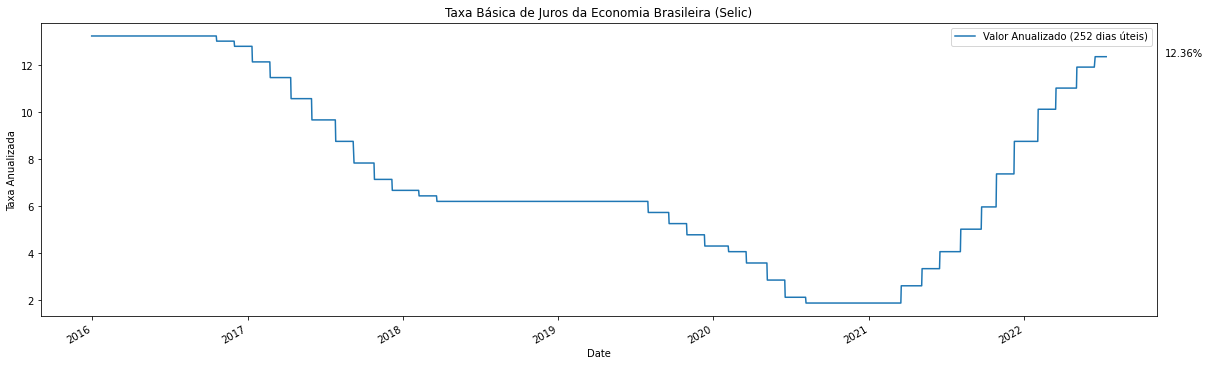

In [38]:
fig, ax = plt.subplots(figsize=(20, 6))
selic.plot(ax=ax)
ax.set_title('Taxa Básica de Juros da Economia Brasileira (Selic)')
plt.legend(['Valor Anualizado (252 dias úteis)'])
plt.ylabel('Taxa Anualizada')
plt.xlabel('Date')
plt.annotate('%0.2f' % selic.value.values[-1] + '%', xy=(1, selic.value.values[-1]), xytext=(8, 0), 
                xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.plot();

In [39]:
dt_index = pd.date_range(start='1/1/2018', end='1/6/2022', freq='D')
df_index = pd.DataFrame()
df_index['date'] = dt_index
df_index['value_i'] = -1
df_index.set_index(['date'], inplace=True)
df_index.sort_index(ascending=True)
df_index

,value_i
date,
2018-01-01,-1
2018-01-02,-1
2018-01-03,-1
2018-01-04,-1
2018-01-05,-1
...,...
2022-01-02,-1
2022-01-03,-1
2022-01-04,-1


#### IPCA

Essa tabela mostra o IPCA acumulado dos últimos 12 meses para cada mês dos últimos 24 meses. O campo “Valor” está em porcentagem.


In [40]:
# Import IPCA csv
ipca = pd.read_csv('./ipca.csv', sep=';')

# Make it daily
ipca['date'] = pd.to_datetime(ipca['date'], format='%d/%m/%Y')
ipca_daily = ipca.set_index('date').resample('d').ffill().reset_index()
ipca_daily.set_index('date', inplace=True)

In [50]:
ipca_daily.to_csv('./ipca_daily.csv', sep=';')
ipca_daily.tail()

,value
date,
2022-05-28,11.73
2022-05-29,11.73
2022-05-30,11.73
2022-05-31,11.73
2022-06-01,11.89


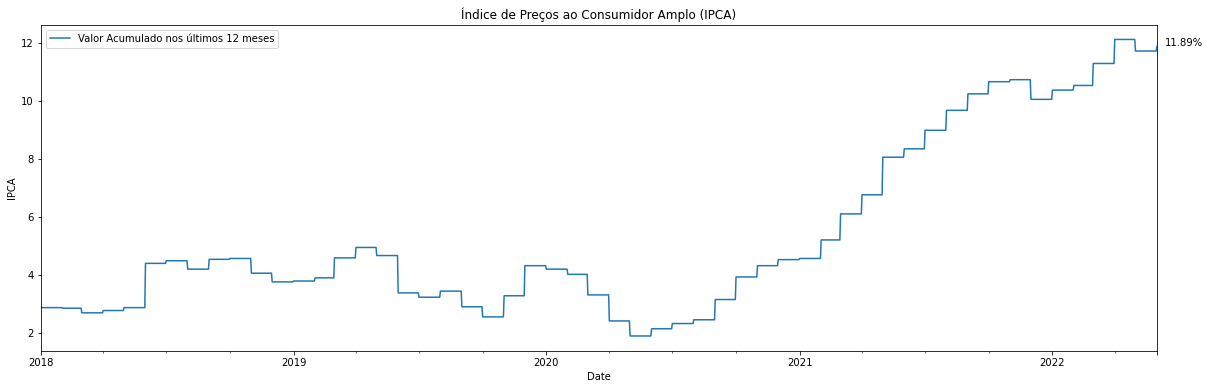

In [42]:
fig, ax = plt.subplots(figsize=(20, 6))
ipca_daily.plot(ax=ax)
ax.set_title('Índice de Preços ao Consumidor Amplo (IPCA)')
plt.legend(['Valor Acumulado nos últimos 12 meses'])
plt.ylabel('IPCA')
plt.xlabel('Date')
plt.annotate('%0.2f' % ipca_daily.value.values[-1] + '%', 
                xy=(1, ipca_daily.value.values[-1]),
                xytext=(8, 0),
                xycoords=('axes fraction', 'data'),
                textcoords='offset points')

plt.plot();

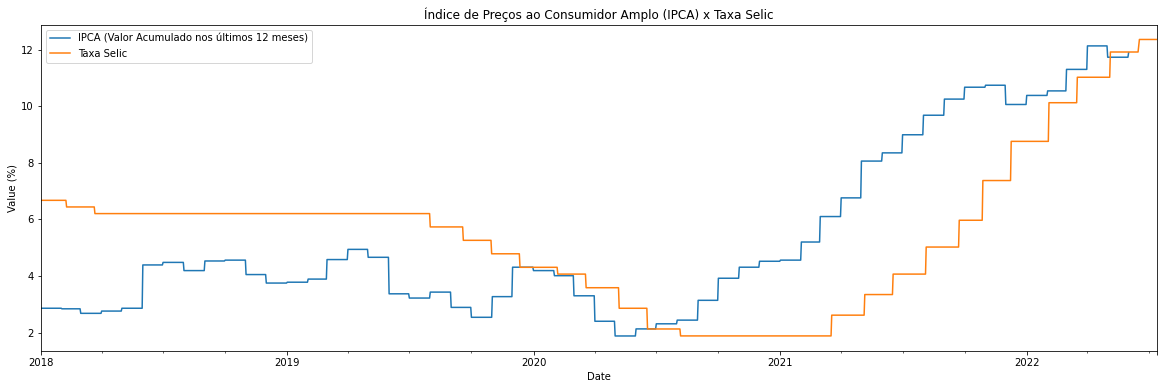

In [52]:
fig, ax = plt.subplots(figsize=(20, 6), sharex=True)
ipca_daily.loc['2018':].plot(ax=ax)
selic.loc['2018':].plot(ax=ax)
ax.set_title('Índice de Preços ao Consumidor Amplo (IPCA) x Taxa Selic')
plt.legend(['IPCA (Valor Acumulado nos últimos 12 meses)', 'Taxa Selic'])
plt.ylabel('Value (%)')
plt.xlabel('Date')

plt.plot();